In [ ]:
#IMPORTAR LIBRERIAS A USAR
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#LEER LOS DATOS DE ENTRENAMIENTO EN UNA VARIABLE
df=pd.read_csv("train_set.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#EMPEZAR LA LIMPIEZA REMOVIENDO VALORES NO NUMERCOS DENTRO DE LA COLUMNA 'bike_id'
df=df[pd.to_numeric(df['bike_id'], errors='coerce').notnull()]

In [ ]:
#CONVERTIR A VALORS NUMERICOS LAS SIGUIENTES COLUMNAS
df['bike_id'] = pd.to_numeric(df['bike_id'])
df['start_station'] = pd.to_numeric(df['start_station'])
df['end_station'] = pd.to_numeric(df['end_station'])

In [ ]:
#Resetear los indices porque se genera una columna de nombre index
df=df.reset_index()
df=df.drop(['index'], axis=1)

In [ ]:
#Guardar el data frame en otra variable
dfNew=df

#AGREGAR NUEVAS COLUMNAS SEPARANDO FECHAS Y HORAS EN DIFERENTES COLUMNAS
dfNew['start_time'] = pd.to_datetime(dfNew['start_time'])
dfNew['Date_start_time'] = pd.to_datetime(df['start_time']).dt.strftime('%d/%m/%Y')
dfNew['Hour_start_time'] = dfNew['start_time'].dt.hour
dfNew['Minute_start_time'] = pd.to_datetime(dfNew['start_time']).dt.minute

dfNew['end_time'] = pd.to_datetime(dfNew['end_time'])
dfNew['Date_end_time'] = pd.to_datetime(df['end_time']).dt.strftime('%d/%m/%Y')
dfNew['Hour_end_time'] = dfNew['end_time'].dt.hour
dfNew['Minute_end_time'] = pd.to_datetime(dfNew['end_time']).dt.minute

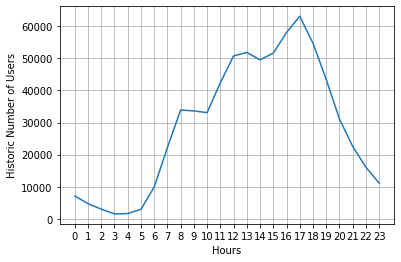

In [ ]:
#HORAS MAS DEMANDANTES
#EN LA GRAFICA DE ABAJO SE MUESTRAN LAS HORAS DONDE EL SERVICIO DE BICICLETAS ES MAS DEMANDANTE, SIENDO ENTRE 16 y 18 HORAS LA MAYOR DEMANDA
hrs = [hr for hr, dfNew in dfNew.groupby('Hour_start_time')]

conta = dfNew.pivot_table(columns=['Hour_start_time'], aggfunc='size')
conta


#plt.plot(hrs, dfNew.groupby(['Hour_start_time']).count()) no funciono, imprime 20 curvas no se porque
plt.plot(hrs,conta)
plt.xticks(hrs)
plt.xlabel('Hours')
plt.ylabel('Historic Number of Users')
plt.grid()
plt.show()

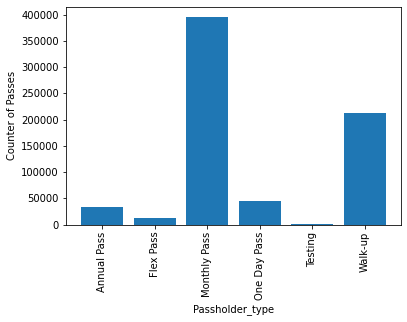

In [ ]:
#TIPOS DE PASES MAS DEMANDANTES
#LA GRAFICA MUESTRA EL TIPO DE PASE PARA CADA PERSONA, DONDE VEMOS QUE EL PASE MENSUAL ES EL MAS POPULAR, MIENTRAS QUE EL PASE DE TESTING ES EL QUE 
#ES MENOS USADO 

passtypes = [passtype for passtype, dfNew in dfNew.groupby('passholder_type')]

passconta = dfNew.pivot_table(columns=['passholder_type'], aggfunc='size')

plt.bar(passtypes,passconta)
plt.xticks(passtypes)
plt.ylabel('Counter of Passes')
plt.xlabel('Passholder_type')
plt.xticks(passtypes, rotation='vertical', size=10)
plt.show()

In [ ]:
#LA TABLA DE ABAJO MUESTRA LAS ESTACIONES MAS USADAS

startstationconta = dfNew.pivot_table(columns=['start_station'], aggfunc='size')
stationfreq=startstationconta.sort_values(ascending=False)

stationfreq.head(10)

start_station
3005    28490
3030    20280
3014    18739
4214    17465
3031    17069
3035    15381
3064    14733
3082    13667
4210    13378
3042    12667
dtype: int64

**PODRIA OBSERVARSE QUE LA VARABLE DE TIPO DE PASE USADO POR CADA PERSONA PUDIERA ESTAR RELACIONADO ENTRE LAS VARIABLES DE HORA CON MAS DEMANDA EN EL SERVICIO, LAS ESTACIONES QUE SON MAS USADAS, ASI COMO CON OTRAS VARIABLES INCLUIDAS EN LA BASE DE DATOS**

In [ ]:
#GUARDAR EL DATA SET DESPUES DE LA LIMPIEZA
dfNew.to_csv("DataCleaned.csv") 